# Life expectancy Analysis
## An investigation of longevity and the  social factors that determine a longer life 

Dataset used was extract from Gapminder World

### INTRODUCTION
The main objective of this investigation is to find out which economic and social factors affects directly in the longevity of people of different countries. 

From this objective arise different questions like:
-Wich variables predict longevity?
-Is there a direct correlation between goverment expenditure and life expetency?
-Do social economic factors such as inequality and corruption affect the life of citizens?

For answering these questions, i am going to analyze how corruption, education, freedom, economic growth, health among others are linked to life expectancy. Using data from 2015 to 2017 of each varible gather on gapminder.com

#### Variable's dictionary
For the research i will be using the next 9 variables
**Life_expect**: The average number of years a newborn child would live if current mortality patterns were to stay the same.
**corruption perception_index**: Transparency international's score of perceptions of corruption. Higher number less corruption.
**health_spend**: The average health expenditure per person paid by goverment, PPP.
**education_exp**: Goverment expenditure per student in primary school. 
**freedix**: Average of political rigths and civil liberties. 1(Most free) 7 (Least Free)
**gdp_growth**: GDP per capita yearly growth.
**gini**: gini index.
**10per_richest**: Income share that the richest 10% accrues.
**Military_exp**: Goverment expenditure on the armed forces

# DATA WRANGLING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/Users/braul/Downloads/dataset_3.csv', sep= ";", index_col ='country')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, Afghanistan to Zimbabwe
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   life_expect_2015                  177 non-null    float64
 1   life_expect_2016                  177 non-null    float64
 2   life_expect_2017                  177 non-null    float64
 3   Corruption perception_index_2015  165 non-null    float64
 4   Corruption perception_index_2016  173 non-null    float64
 5   Corruption perception_index_2017  177 non-null    int64  
 6   Education_exp_2015                151 non-null    float64
 7   Education_exp_2016                151 non-null    float64
 8   Education_exp_2017                151 non-null    float64
 9   freedix_2015                      177 non-null    float64
 10  freedix_2016                      177 non-null    float64
 11  freedix_2017                      177 non-null    float64
 12

As we can see in the info, there are some columns with no values, for fix this problem i'm going to use the mean of each column to fill the empty spaces; in this way we´re not going to have issues to analyze the information correctly

In [6]:
#Calculating the mean
mean1 = round(df['Corruption perception_index_2015'].mean(), 2)
mean2 = round(df['Corruption perception_index_2016'].mean(), 2)
mean3 = round(df['Education_exp_2015'].mean(), 2)
mean4 = round(df['Education_exp_2016'].mean(), 2)
mean5 = round(df['Education_exp_2017'].mean(), 2)
mean6 = round(df['health_spend'].mean(), 2)
mean7 = round(df['10per_richest_2015'].mean(), 2)
mean8 = round(df['10per_richest_2016'].mean(), 2)
mean9 = round(df['10per_richest_2017'].mean(), 2)
mean10 = round(df['Military_exp_2015'].mean(), 2)
mean11 = round(df['Military_exp_2016'].mean(), 2)
mean12 = round(df['Military_exp_2017'].mean(), 2)

df['Corruption perception_index_2015'] = df['Corruption perception_index_2015'].fillna(mean1)
df['Corruption perception_index_2016'] = df['Corruption perception_index_2016'].fillna(mean2)
df['Education_exp_2015'] = df['Education_exp_2015'].fillna(mean3)
df['Education_exp_2016'] = df['Education_exp_2016'].fillna(mean4)
df['Education_exp_2017'] = df['Education_exp_2017'].fillna(mean5)
df['health_spend'] = df['health_spend'].fillna(mean6)
df['10per_richest_2015'] = df['10per_richest_2015'].fillna(mean7)
df['10per_richest_2016'] = df['10per_richest_2016'].fillna(mean8)
df['10per_richest_2017'] = df['10per_richest_2017'].fillna(mean9)
df['Military_exp_2015'] = df['Military_exp_2015'].fillna(mean10)
df['Military_exp_2016'] = df['Military_exp_2016'].fillna(mean11)
df['Military_exp_2017'] = df['Military_exp_2017'].fillna(mean12)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, Afghanistan to Zimbabwe
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   life_expect_2015                  177 non-null    float64
 1   life_expect_2016                  177 non-null    float64
 2   life_expect_2017                  177 non-null    float64
 3   Corruption perception_index_2015  177 non-null    float64
 4   Corruption perception_index_2016  177 non-null    float64
 5   Corruption perception_index_2017  177 non-null    int64  
 6   Education_exp_2015                177 non-null    float64
 7   Education_exp_2016                177 non-null    float64
 8   Education_exp_2017                177 non-null    float64
 9   freedix_2015                      177 non-null    float64
 10  freedix_2016                      177 non-null    float64
 11  freedix_2017                      177 non-null    float64
 12

Once we completed our missing information, we are going to create an easier way to analize our data. Since we have 3 years of each variable; it could be useful to merge them into 1 single column that describe the average of each factor

In [7]:
#CREADOR DE COLUMNAS CON PROMEDIOS
df['life_expect'] = ((df['life_expect_2015'] + df['life_expect_2016'] + df['life_expect_2017'])/3)
df['corruption perception_index'] = ((df['Corruption perception_index_2015'] + df['Corruption perception_index_2016'] 
                                      + df['Corruption perception_index_2017'])/3)
df['education_exp'] = ((df['Education_exp_2015'] + df['Education_exp_2016'] + df['Education_exp_2017'])/3)
df['freedix'] = ((df['freedix_2015'] + df['freedix_2016'] + df['freedix_2017'])/3)
df['gdp_growth'] = ((df['gdp_growth_2015'] + df['gdp_growth_2016'] + df['gdp_growth_2017'])/3)
df['gini'] = ((df['gini_2015'] + df['gini_2016'] + df['gini_2017'])/3)
df['10per_richest'] = ((df['10per_richest_2015'] + df['10per_richest_2016'] + df['10per_richest_2017'])/3)
df[' Military_exp'] = ((df['Military_exp_2015'] + df['Military_exp_2016'] + df['Military_exp_2017'])/3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, Afghanistan to Zimbabwe
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   life_expect_2015                  177 non-null    float64
 1   life_expect_2016                  177 non-null    float64
 2   life_expect_2017                  177 non-null    float64
 3   Corruption perception_index_2015  177 non-null    float64
 4   Corruption perception_index_2016  177 non-null    float64
 5   Corruption perception_index_2017  177 non-null    int64  
 6   Education_exp_2015                177 non-null    float64
 7   Education_exp_2016                177 non-null    float64
 8   Education_exp_2017                177 non-null    float64
 9   freedix_2015                      177 non-null    float64
 10  freedix_2016                      177 non-null    float64
 11  freedix_2017                      177 non-null    float64
 12

Now that we have the mean of every column we will drop the series times as we are not going to use them.

In [8]:
del df['life_expect_2015']
del df['life_expect_2016']
del df['life_expect_2017']
del df['Corruption perception_index_2015']
del df['Corruption perception_index_2016']
del df['Corruption perception_index_2017']
del df['Education_exp_2015']
del df['Education_exp_2016']
del df['Education_exp_2017']
del df['freedix_2015']
del df['freedix_2016']
del df['freedix_2017']
del df['gdp_growth_2015']
del df['gdp_growth_2016']
del df['gdp_growth_2017']
del df['gini_2015']
del df['gini_2016']
del df['gini_2017']
del df['10per_richest_2015']
del df['10per_richest_2016']
del df['10per_richest_2017']
del df['Military_exp_2015']
del df['Military_exp_2016']
del df['Military_exp_2017']

Now our data is complete, clean and ready to analyze.
To check this we can use describe and info as follows:

In [14]:
df.describe()

,health_spend,life_expect,corruption perception_index,education_exp,freedix,gdp_growth,gini,10per_richest,Military_exp
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,712.544859,72.479473,42.611902,0.072323,3.545198,2.929712,38.749153,13.259454,0.017145
std,1047.657012,7.358934,19.011440,0.063873,2.023886,2.313622,7.595394,11.272352,0.015659
min,0.000000,51.500000,9.000000,0.000000,1.000000,-6.806667,24.933333,0.000000,0.000000
25%,50.300000,67.700000,28.666667,0.000000,1.666667,1.550000,32.800000,0.000000,0.009327
50%,260.000000,73.533333,38.000000,0.073333,3.166667,2.630000,38.400000,12.866667,0.014267
75%,830.000000,78.100000,53.666667,0.116800,5.500000,4.066667,43.200000,22.833333,0.020000
max,5690.000000,84.633333,90.000000,0.332667,7.000000,19.906667,63.033333,41.666667,0.111233


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, Afghanistan to Zimbabwe
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   health_spend                 177 non-null    float64 
 1   life_expect                  177 non-null    float64 
 2   corruption perception_index  177 non-null    float64 
 3   education_exp                177 non-null    float64 
 4   freedix                      177 non-null    float64 
 5   gdp_growth                   177 non-null    float64 
 6   gini                         177 non-null    float64 
 7   10per_richest                177 non-null    float64 
 8    Military_exp                177 non-null    float64 
 9   corruptions_levels           177 non-null    category
dtypes: category(1), float64(9)
memory usage: 14.2+ KB


# Exploratory Data Analysis 

### Wich variables predict the longevity?
In order to watch how the different variables interact with life expectancy, we are going to model the correlation and make some scatter plots.

In [79]:
df.describe()

,health_spend,life_expect,corruption perception_index,education_exp,freedix,gdp_growth,gini,10per_richest,Military_exp
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,712.544859,72.479473,42.611902,0.072323,3.545198,2.929712,38.749153,13.259454,0.017145
std,1047.657012,7.358934,19.011440,0.063873,2.023886,2.313622,7.595394,11.272352,0.015659
min,0.000000,51.500000,9.000000,0.000000,1.000000,-6.806667,24.933333,0.000000,0.000000
25%,50.300000,67.700000,28.666667,0.000000,1.666667,1.550000,32.800000,0.000000,0.009327
50%,260.000000,73.533333,38.000000,0.073333,3.166667,2.630000,38.400000,12.866667,0.014267
75%,830.000000,78.100000,53.666667,0.116800,5.500000,4.066667,43.200000,22.833333,0.020000
max,5690.000000,84.633333,90.000000,0.332667,7.000000,19.906667,63.033333,41.666667,0.111233


In [16]:
df.corr()

,health_spend,life_expect,corruption perception_index,education_exp,freedix,gdp_growth,gini,10per_richest,Military_exp
health_spend,1.000000,0.608001,0.791839,0.305043,-0.532935,-0.323026,-0.373218,0.285947,-0.042418
life_expect,0.608001,1.000000,0.658276,0.401120,-0.488161,-0.243741,-0.408390,0.467238,0.118763
corruption perception_index,0.791839,0.658276,1.000000,0.343580,-0.703493,-0.267340,-0.284537,0.313851,0.012678
education_exp,0.305043,0.401120,0.343580,1.000000,-0.464866,-0.142323,-0.243498,0.330067,-0.075729
freedix,-0.532935,-0.488161,-0.703493,-0.464866,1.000000,0.166031,0.158206,-0.358404,0.175848
gdp_growth,-0.323026,-0.243741,-0.267340,-0.142323,0.166031,1.000000,0.035650,-0.132602,-0.085912
gini,-0.373218,-0.408390,-0.284537,-0.243498,0.158206,0.035650,1.000000,-0.084460,-0.007761
10per_richest,0.285947,0.467238,0.313851,0.330067,-0.358404,-0.132602,-0.084460,1.000000,-0.044415
Military_exp,-0.042418,0.118763,0.012678,-0.075729,0.175848,-0.085912,-0.007761,-0.044415,1.000000


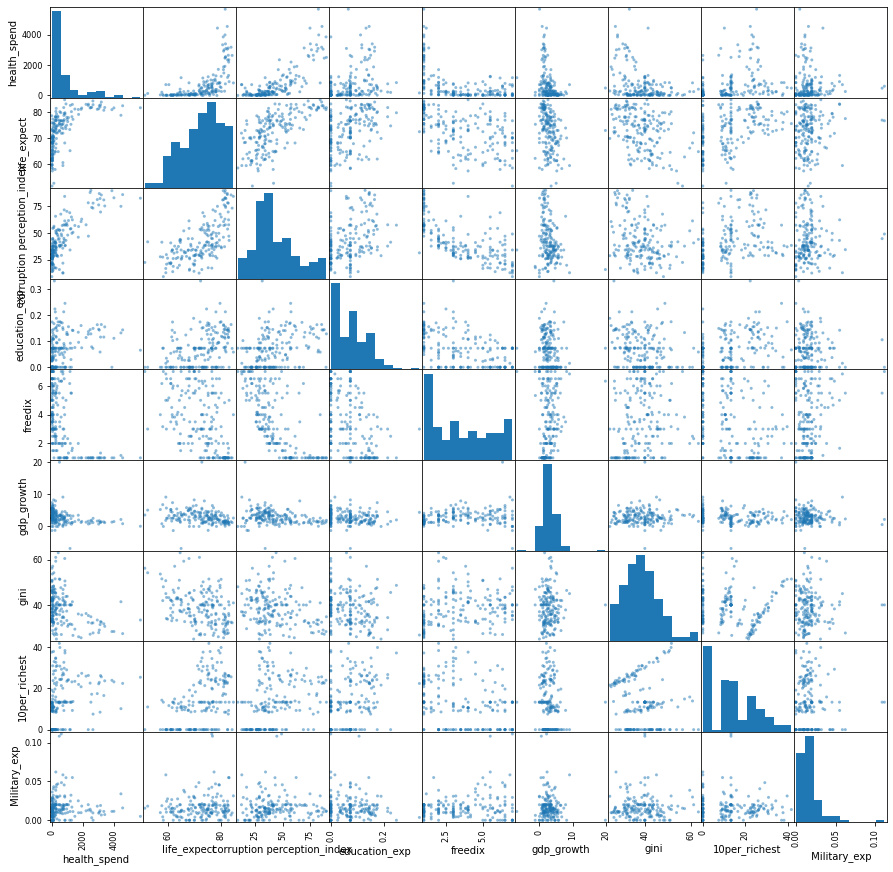

In [21]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

We can observe that **life expectancy** is correlated in a higher level to: health expenditure, corruption, inequality and education than to other variables. 

## Is there a direct correlation between goverment expenditure and life expetency?
There are 2 variables that express the goverment expenditure in society. The health expenditure and the education expenditure.
Let´s analice them separately

### Health expenditure

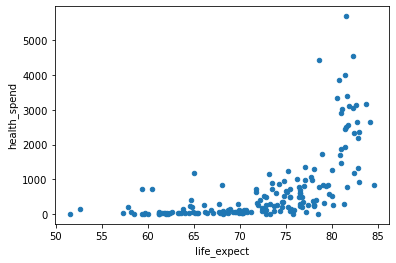

In [56]:
df.plot(x= 'life_expect', y='health_spend', kind='scatter');

In the scatter plot we can see a clear correlation between our 2 variables, let's explore them in detail

In [49]:
#Health descrption
print(df['health_spend'].describe())
health_median = df['health_spend'].median()
print('The median of health expenditure is {}'.format(health_median))


count     177.000000
mean      712.544859
std      1047.657012
min         0.000000
25%        50.300000
50%       260.000000
75%       830.000000
max      5690.000000
Name: health_spend, dtype: float64
The median of health expenditure is 260.0


The life expectancy of a citizen in a country that spends less than 260 USD in health care is 67.62
The life expectancy of a citizen in a country that spends more than 260 USD in health care is 77.28
The difference is 9.66 years


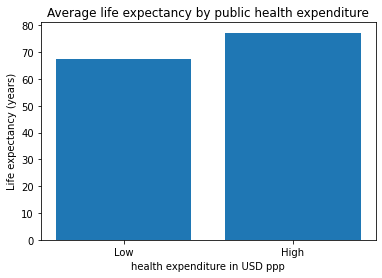

In [106]:
low_spend = df.query('health_spend < 260')
high_spend = df.query('health_spend >= 260')
locations = [1, 2]
heights = [low_spend.life_expect.mean(), high_spend.life_expect.mean()]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels);
plt.title('Average life expectancy by public health expenditure');
plt.xlabel('health expenditure in USD ppp');
plt.ylabel('Life expectancy (years)');
print('The life expectancy of a citizen in a country that spends less than 260 USD in health care is {}'.format(round(low_spend.life_expect.mean(), 2)))
print('The life expectancy of a citizen in a country that spends more than 260 USD in health care is {}'.format(round(high_spend.life_expect.mean(),2)))
print('The difference is {} years'.format(round(high_spend.life_expect.mean() - low_spend.life_expect.mean(),2)))

### Education expenditure

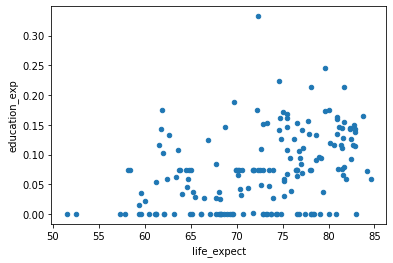

In [70]:
df.plot(x= 'life_expect', y='education_exp', kind='scatter');

It is not clear that there is a correlation due to some data points, but let's do a deeper investigation of it

In [47]:
#Education description
print(df['education_exp'].describe())
edc_median = round(df['education_exp'].median(), 4)
print('The median of education expenditure is {}%'.format((edc_median)*100))

count    177.000000
mean       0.072323
std        0.063873
min        0.000000
25%        0.000000
50%        0.073333
75%        0.116800
max        0.332667
Name: education_exp, dtype: float64
0.0733
The median of education expenditure is 7.33%


The life expectancy of a citizen in a country that spends less than 7.3% of its GDP in primary education is 69.96
The life expectancy of a citizen in a country that spends more than 7.3% of its GDP primary education is 76.62


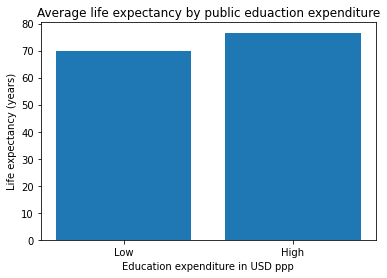

In [107]:
edc_low_spend = df.query('education_exp < 0.074')
edc_high_spend = df.query('education_exp >= 0.074')
locations = [1, 2]
heights = [edc_low_spend.life_expect.mean(), edc_high_spend.life_expect.mean()]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels);
plt.title('Average life expectancy by public eduaction expenditure');
plt.xlabel('Education expenditure in USD ppp');
plt.ylabel('Life expectancy (years)');
print('The life expectancy of a citizen in a country that spends less than 7.3% of its GDP in primary education is {}'.format(round(edc_low_spend.life_expect.mean(), 2)))
print('The life expectancy of a citizen in a country that spends more than 7.3% of its GDP primary education is {}'.format(round(edc_high_spend.life_expect.mean(),2)))

## Conclusion

In [54]:
#Here we are merging our expenditure means to calculate a life expectancy by a whole goverment expenditure
low_exp_life_mean = round((low_spend.life_expect.mean() + edc_low_spend.life_expect.mean())/2, 2)
high_exp_life_mean = round((high_spend.life_expect.mean() + edc_high_spend.life_expect.mean())/2, 2)
dif_expectancy = round((high_exp_life_mean - low_exp_life_mean), 2)
print('On average a person that lives in a country with low goverment social expenditure will die at the age of {},\
while a person living in a country that invests in its citizens will live {}. The difference is {} years'.
      format(low_exp_life_mean, high_exp_life_mean, dif_expectancy))

On average a person that lives in a country with low goverment social expenditure will die at the age of 68.79,while a person living in a country that invests in its citizens will live 76.95. The difference is 8.16 years


## Do social economic factors such as corruption and inequality affect the life of citizens?

### Corruption perception index

For analyze corruption we can group the countries by levels of corruption. Let's do a group by quarters taking the min, 25%, 50%, 75% and Max as the list of values.

AxesSubplot(0.125,0.125;0.775x0.755)


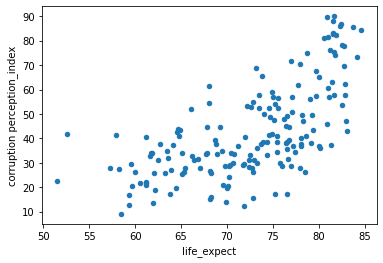

In [74]:
print(df.plot(x= 'life_expect', y='corruption perception_index', kind='scatter'))

In [59]:
df['corruption perception_index'].describe()

count    177.000000
mean      42.611902
std       19.011440
min        9.000000
25%       28.666667
50%       38.000000
75%       53.666667
max       90.000000
Name: corruption perception_index, dtype: float64

In [78]:
#Now to analize corruption, we are going to create categories
# Bin edges that will be used to "cut" the data into groups
bin_edges = [8.9, 28.66, 38, 53.66, 91] # Fill in this list with five values you just found
bin_names = ['High', 'Moderately_High', 'Medium', 'Low']
df['corruptions_levels'] = pd.cut(df['corruption perception_index'], bin_edges, labels=bin_names)
df.describe()

,health_spend,life_expect,corruption perception_index,education_exp,freedix,gdp_growth,gini,10per_richest,Military_exp
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,712.544859,72.479473,42.611902,0.072323,3.545198,2.929712,38.749153,13.259454,0.017145
std,1047.657012,7.358934,19.011440,0.063873,2.023886,2.313622,7.595394,11.272352,0.015659
min,0.000000,51.500000,9.000000,0.000000,1.000000,-6.806667,24.933333,0.000000,0.000000
25%,50.300000,67.700000,28.666667,0.000000,1.666667,1.550000,32.800000,0.000000,0.009327
50%,260.000000,73.533333,38.000000,0.073333,3.166667,2.630000,38.400000,12.866667,0.014267
75%,830.000000,78.100000,53.666667,0.116800,5.500000,4.066667,43.200000,22.833333,0.020000
max,5690.000000,84.633333,90.000000,0.332667,7.000000,19.906667,63.033333,41.666667,0.111233


corruptions_levels
High               65.994309
Moderately_High    71.072109
Medium             73.100000
Low                79.341481
Name: life_expect, dtype: float64


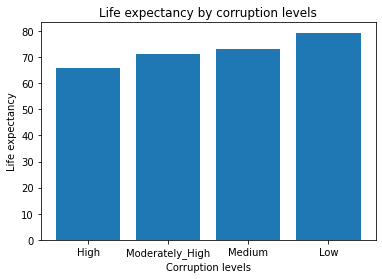

In [61]:
print(df.groupby('corruptions_levels')['life_expect'].mean())
location = [1, 2, 3, 4]
corruption_levels_mean = [65.99, 71.072, 73.1, 79.341]
plt.bar(location, corruption_levels_mean, tick_label=bin_names)
plt.title('Life expectancy by corruption levels')
plt.xlabel('Corruption levels')
plt.ylabel('Life expectancy');

In [69]:
dif_corruption = round((79.34 - 65.99), 2)
('The diffence between a country with high corruption levels and low corruption levels could significate {} years of life of a person'.format(dif_corruption))

'The diffence between a country with high corruption levels and low corruption levels could significate 13.35 years of life of a person'

### Inequality; the gini index

<AxesSubplot:xlabel='life_expect', ylabel='gini'>

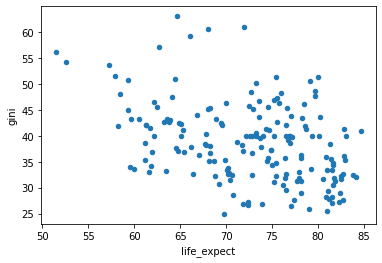

In [75]:
df.plot(x= 'life_expect', y='gini', kind='scatter')

In [81]:
df['gini'].describe()

count    177.000000
mean      38.749153
std        7.595394
min       24.933333
25%       32.800000
50%       38.400000
75%       43.200000
max       63.033333
Name: gini, dtype: float64

We are going to create ranges going every 5%, in this way would be clearer for us if some levels of inequality are better than others

In [88]:
#Now to analize inequality, we are going to create categories
# Bin edges that will be used to "cut" the data into groups
bin_edges = [23,28,33,38,43,48,53,58,63.1] # Fill in this list with five values you just found
bin_names = ['1','2', '3', '4','5','6','7','8']
df['inequality_levels'] = pd.cut(df['gini'], bin_edges, labels=bin_names)

In [98]:
print(df.groupby('inequality_levels')['life_expect'].mean())

inequality_levels
1    77.112821
2    76.566667
3    72.376923
4    71.668085
5    70.223457
6    71.780000
7    56.008333
8    67.683333
Name: life_expect, dtype: float64


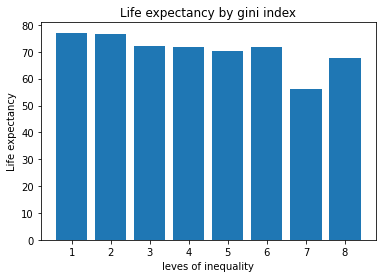

In [99]:
inequality_means = [77.1,  76.5, 72.3, 71.6, 70.22, 71.78,56, 67.68]
location = [1, 2, 3, 4, 5, 6, 7, 8]
plt.bar(location, inequality_means, tick_label=location)
plt.title('Life expectancy by gini index')
plt.xlabel('leves of inequality')
plt.ylabel('Life expectancy');

After separating the gini in ranges of 5% we can see a trend but it is not explict, let's take the median and create two groups of "High" and "Low" inequality

In [100]:
df['gini'].describe()

count    177.000000
mean      38.749153
std        7.595394
min       24.933333
25%       32.800000
50%       38.400000
75%       43.200000
max       63.033333
Name: gini, dtype: float64

Life expectancy in low inequality countries 74.54
Life expectancy in high inequality countries 70.44


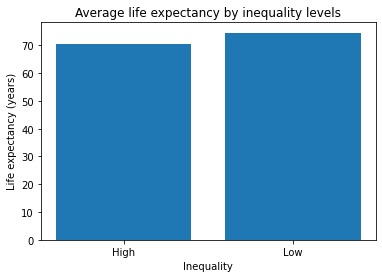

In [103]:
high_inequality = df.query('gini >= 38.4')
low_inequality = df.query('gini < 38.4')
locations = [1, 2]
heights = [high_inequality.life_expect.mean(), low_inequality.life_expect.mean()]
labels = ['High', 'Low']
plt.bar(locations, heights, tick_label=labels);
plt.title('Average life expectancy by inequality levels');
plt.xlabel('Inequality');
plt.ylabel('Life expectancy (years)');

print('Life expectancy in low inequality countries {}'.format(round(low_inequality.life_expect.mean(),2)))
print('Life expectancy in high inequality countries {}'.format(round(high_inequality.life_expect.mean(),2)))

After the analysis we can observe the following:
-Less corrupt countries lives on average 13.35 years than more corrupt countries.
-Countries with higher inequality have a lower life expectancy than countries with less inequality.

# Final conclusions

**Disclaimer** This investigation used just 3 years of data and simplify it by making an average result of the 3 ones. So it could no be conclusive on causation.



### Wich variables predict  longevity?
We can observe that **life expectancy** is correlated in a higher level to: health expenditure, corruption, inequality and education than to other variables. 
It is not conclusive because the lack of some statistical analysis, but it could be a hint of factors that affects people's years of life

### Is there a direct correlation between goverment expenditure and life expetency?
Yes, there is correlation between social expenditure and the years of life of the country's population.

**Health expenditure:** A country with higher healthcare expenditure has 9.66 more years of life expectancy than those with a worse health system.
**Eduacition expenditure:** The life expectancy of a citizen in a country that spends less than 7.3% of its GDP in primary education is 69.96
The life expectancy of a citizen in a country that spends more than 7.3% of its GDP primary education is 76.62

**Public expenditure** On average a person that lives in a country with low goverment social expenditure will die at the age of 68.79,while a person living in a country that invests in its citizens will live 76.95. The difference is 8.16 years

### Do social economic factors such as inequality and corruption affect the life of citizens?
Yes, those 2 variables are correlated to life expectancy.
**Corruption:** The difference between a country with high corruption levels and low corruption levels could significate 13.35 years of life of a person
**Inequality:**  While the life expectancy in a country with low inequality levels is 74.54, the life expectancy in high inequality countries 70.44


###Bibliografy:
https://stackoverflow.com/questions/64455605/python-spyder-show-all-colums-of-a-pandas-dataframe-in-describe
https://eprints.ucm.es/id/eprint/48304/1/ManualJupyter.pdf
Udacity classes
https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot